In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from dynadojo.systems.lds import LDSystem
from dynadojo.baselines.lr import LinearRegression
from dynadojo.baselines.dnn import DNN
from dynadojo.challenges import FixedComplexity
import pandas as pd

In [6]:
challenge = FixedComplexity(
    N=[10, 50, 100, 500, 1000],
    l=5,
    e=5,
    t=50,
    control_horizons=0,
    max_control_cost_per_dim=0,
    system_cls=LDSystem,
    trials=10,
    test_examples=50,
    test_timesteps=50,
)
data1 = challenge.evaluate(LinearRegression, id="linear regression")
data2 = challenge.evaluate(DNN, algo_kwargs={"activation": "relu"}, fit_kwargs={"epochs": 20}, id="nonlinear network")
data3 = challenge.evaluate(DNN, fit_kwargs={"epochs": 20}, id="linear network")

/Users/ngan/playground/DynaDojo/.venv/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/ngan/playground/DynaDojo/.venv/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [7]:
data = pd.concat((data1, data2, data3))
data.head()

,job_id,trial,latent_dim,embed_dim,timesteps,n,error,ood_error,total_cost,duration,system_seed,algo_seed,id
0,0,1,5,5,50,10,3.150268e-14,None,0,0.000565,1997345670,2698294582,linear regression
1,0,1,5,5,50,50,1.130690e-13,None,0,0.000589,1997345670,2698294582,linear regression
2,0,1,5,5,50,100,1.285001e-13,None,0,0.000799,1997345670,2698294582,linear regression
3,0,1,5,5,50,500,1.152419e-13,None,0,0.002989,1997345670,2698294582,linear regression
4,0,1,5,5,50,1000,1.137813e-13,None,0,0.008143,1997345670,2698294582,linear regression


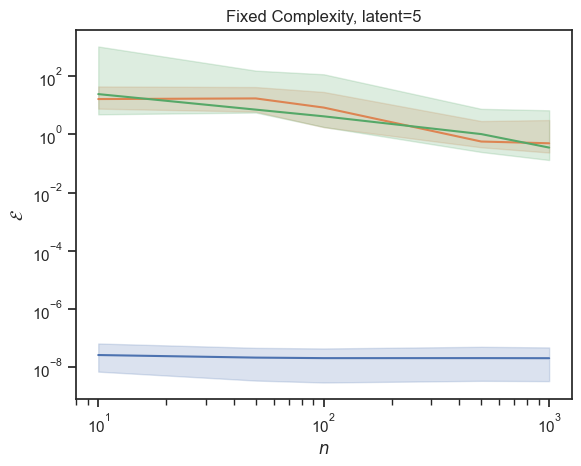

<Axes: title={'center': 'Fixed Complexity, latent=5'}, xlabel='$n$', ylabel='$\\mathcal{E}$'>

In [8]:
challenge.plot(data)